In [44]:
import torch

## Tensors

In [45]:
num =1
type(num)

int

In [46]:
t1 = torch.tensor(1)
print(t1)

tensor(1)


In [47]:
type(t1)

torch.Tensor

In [48]:
t1.dtype

torch.int64

In [49]:
## Vector

t2 = torch.tensor([1.,2,3,4])
print(t2)

tensor([1., 2., 3., 4.])


In [50]:
## matrics

t3 = torch.tensor([
    [5.,6],
    [6,8],
    [9,10]
])

print(t3)

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])


In [51]:
## 3d matrics

t4 = torch.tensor([
    [[11,12,13],
     [13,14,15]],
    [[15,16,17],
     [17,18,19]]
])

print(t4)

tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])


In [52]:
print(t1)
t1.shape

tensor(1)


torch.Size([])

In [53]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [54]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [55]:
print(t4)
t4.shape

tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])


torch.Size([2, 2, 3])

## Tensor Function

In [56]:
t6 = torch.full((3,2),42)

In [57]:
print(t6)

tensor([[42, 42],
        [42, 42],
        [42, 42]])


In [58]:
t3

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.]])

In [59]:
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [60]:
t7 = torch.cat((t3,t6))

In [61]:
print(t7)

tensor([[ 5.,  6.],
        [ 6.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])


In [62]:
t8 = torch.sin(t7)

In [63]:
print(t8)

tensor([[-0.9589, -0.2794],
        [-0.2794,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])


In [64]:
t9 = t8.reshape(3,2,2)

In [65]:
t9

tensor([[[-0.9589, -0.2794],
         [-0.2794,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

In [66]:
## Interroperbility with numpy

import numpy as np

In [67]:
x = np.array([[1,2],
              [3,4]])

In [68]:
x

array([[1, 2],
       [3, 4]])

In [69]:
type(x)

numpy.ndarray

In [70]:
y = torch.from_numpy(x)

In [71]:
type(y)

torch.Tensor

In [72]:
y.numpy()

array([[1, 2],
       [3, 4]])

# Neural Network using Pytorch

In [73]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [74]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform= ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor()

)

In [75]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

In [76]:
train_dataloader

In [77]:
for X,y in train_dataloader:
  print(X)
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [78]:
for X,y in train_dataloader:
  print(X.shape)
  break

torch.Size([64, 1, 28, 28])


In [79]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [80]:
device

'cuda'

In [81]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [82]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [83]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [84]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [85]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [86]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302957  [    0/60000]
loss: 2.284329  [ 6400/60000]
loss: 2.270658  [12800/60000]
loss: 2.269409  [19200/60000]
loss: 2.232303  [25600/60000]
loss: 2.222473  [32000/60000]
loss: 2.223391  [38400/60000]
loss: 2.196027  [44800/60000]
loss: 2.197409  [51200/60000]
loss: 2.160148  [57600/60000]
Test Error: 
 Accuracy: 47.2%, Avg loss: 2.153015 

Epoch 2
-------------------------------
loss: 2.167184  [    0/60000]
loss: 2.152220  [ 6400/60000]
loss: 2.100777  [12800/60000]
loss: 2.115679  [19200/60000]
loss: 2.051740  [25600/60000]
loss: 2.001420  [32000/60000]
loss: 2.029427  [38400/60000]
loss: 1.952409  [44800/60000]
loss: 1.970609  [51200/60000]
loss: 1.888299  [57600/60000]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.884905 

Epoch 3
-------------------------------
loss: 1.922050  [    0/60000]
loss: 1.892325  [ 6400/60000]
loss: 1.775343  [12800/60000]
loss: 1.812117  [19200/60000]
loss: 1.695576  [25600/60000]
loss: 1.645821  [32000/600

In [87]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [88]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [89]:
## Prediction

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


model.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [90]:
classes[9]

'Ankle boot'

In [91]:
x, y = test_data[0][0], test_data[0][1]

In [92]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [93]:
y

9

In [94]:
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [95]:
# cifar10

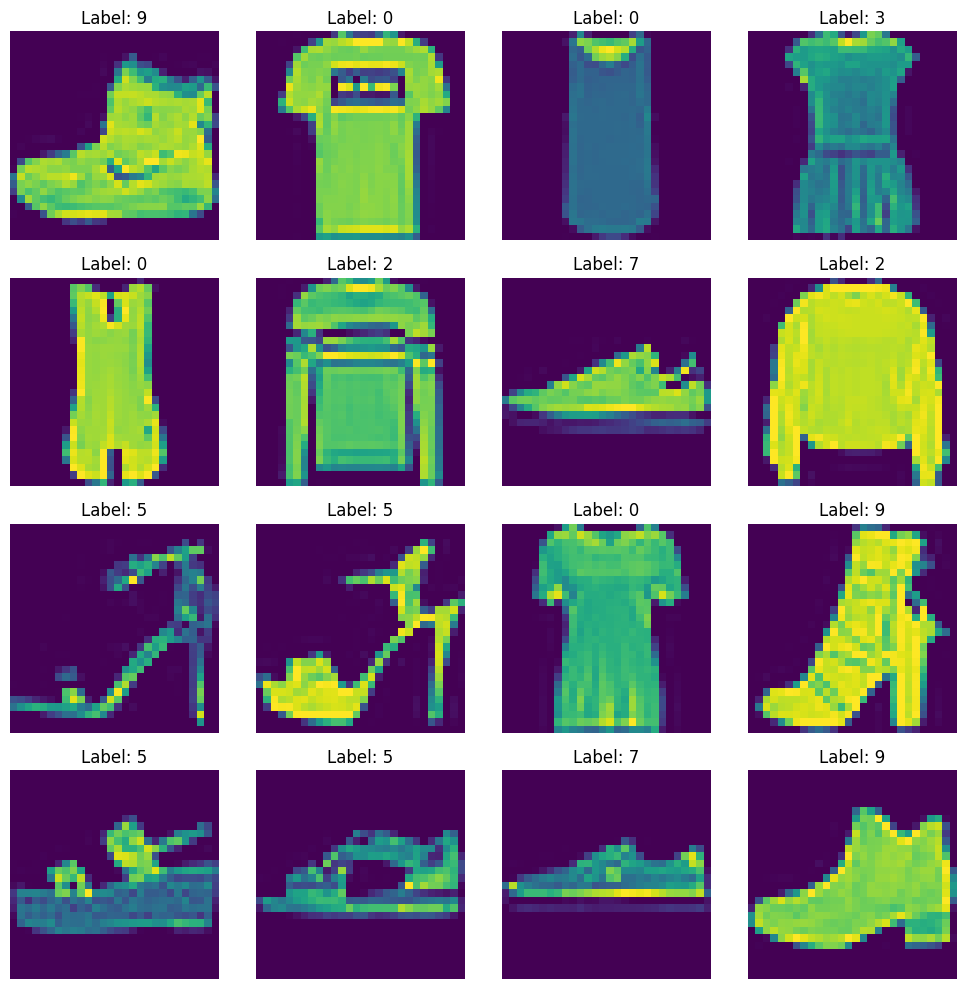

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Loop through the training dataloader to get a batch
for images, labels in train_dataloader:
    break  # Get the first batch and exit loop

# Convert the images to numpy arrays
images = images.numpy()

# Plot the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()